In [57]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [15]:
raw_data_X = np.random.random((10, 2))
raw_data_y = [0,0,0,0,0,0,1,1,1,1]

In [31]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)
X_train

array([[0.67331493, 0.73309309],
       [0.51219803, 0.36719215],
       [0.19012248, 0.86724231],
       [0.49299489, 0.33399094],
       [0.82565846, 0.34022026],
       [0.8158004 , 0.42280888],
       [0.67644707, 0.2265347 ],
       [0.41902125, 0.14572895],
       [0.46027303, 0.12374679],
       [0.30135463, 0.06598894]])

In [33]:
X_train[y_train==1, 0]

array([0.67644707, 0.41902125, 0.46027303, 0.30135463])

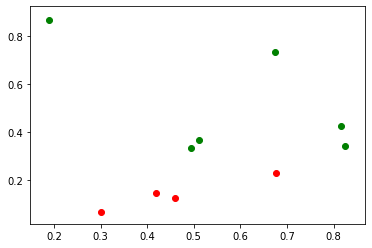

In [34]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1],  color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1],  color='r')

In [118]:
x = np.array([0.5, 0.3])
y = np.array([0.4, 0.2])

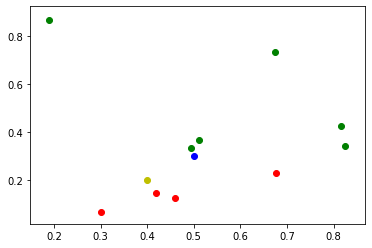

In [119]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1],  color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1],  color='r')
plt.scatter(x[0], x[1], color='b')
plt.scatter(y[0], y[1], color='y')

In [74]:
### 我的解法
distances = []
mp = {}
K = 3
# 欧拉距离, a,b两个点之间的"多维度差平方和"再开方
for i in range(len(X_train)):
    x_train = X_train[i]
    dis = math.sqrt((x_train[0] - x[0]) ** 2 + (x_train[1] - x[1]) ** 2 )
    typ = y_train[i]
    mp[dis] = typ
    distances.append(dis) 
distances.sort()
[mp[i] for i in distances][:K]

[0, 0, 1]

In [90]:
### 官方解法
distances = [math.sqrt(np.sum((point - x) ** 2)) for point in X_train]
distances

[0.46648439441546363,
 0.0682903862731751,
 0.6463651526291164,
 0.034705265594495945,
 0.3281327478911496,
 0.3388390628403662,
 0.19113010760222668,
 0.17423293446586674,
 0.1806749153874836,
 0.30695465617710876]

In [98]:
lowest_3 = np.argsort(distances)[:K]
lowest_3

array([3, 1, 7])

In [100]:
[y_train[index] for index in lowest_3]
###

[0, 0, 1]

In [110]:
### 方法三： sklearn版本knn
from sklearn.neighbors import KNeighborsClassifier
kNN_classifier = KNeighborsClassifier(n_neighbors=3)

In [111]:
#拟合
kNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [120]:
# 自动拟合完毕 kNN_classifier 就是模型了
kNN_classifier.predict(np.array([y]))

array([1])